# Preparations

In [1]:
# Env
from Env4_Two_Step_Task import *
from Agent import *

In [4]:
# Save Paths
from datetime import datetime
path = "../Log/train_modular/" + datetime.now().strftime("%m%d-%H:%M:%S")

In [5]:
# Hyperparameters
gamma = 0.9  # Discount factor for past rewards
learning_rate = 7e-4
beta_v = 0.05
beta_e = 0.05

# train
nb_trials = 100
nb_episodes = 20000

In [6]:
env = Two_Step_Task()

# Agent
agent = Agent(learning_rate, gamma, beta_v, beta_e,  #loss func
                 env, nb_trials, nb_episodes,  #train
                 path)

2023-01-08 23:22:52.071932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Training

In [5]:
agent.train()

AttributeError: 'Agent' object has no attribute 'path'

In [ ]:
# agent.model.save(path+'/model.h5')

# Testing

In [9]:
test_model = keras.models.load_model('Log/train_Two_Step_Task/0105-21:52:39/model.h5')
#test_model = model
test_episode = 300

In [10]:
agent.test(test_episode, test_model)

# Analysis

In [11]:
print(agent.env.stayProb())

[[[19299.   249.]
  [  686.   352.]]

 [[ 2635.  1652.]
  [ 4675.   152.]]]
[[[0.98726212 0.01273788]
  [0.66088632 0.33911368]]

 [[0.61464894 0.38535106]
  [0.96851046 0.03148954]]]


[[[19299.   249.]
  [  686.   352.]]

 [[ 2635.  1652.]
  [ 4675.   152.]]]


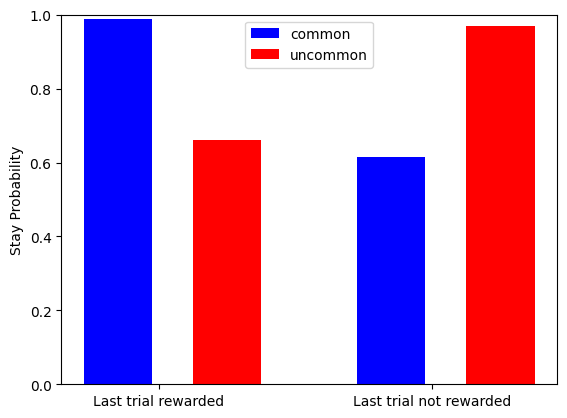

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.arange(2)
ax.set_ylim([0.0, 1.0])
ax.set_ylabel('Stay Probability')

stay_probs = agent.env.stayProb()

common = [stay_probs[0,0,0],stay_probs[1,0,0]]
uncommon = [stay_probs[0,1,0],stay_probs[1,1,0]]

ax.set_xticks([1.3,3.3])
ax.set_xticklabels(['Last trial rewarded', 'Last trial not rewarded'])

c = plt.bar([1,3],  common, color='b', width=0.5)
uc = plt.bar([1.8,3.8], uncommon, color='r', width=0.5)
plt.ylim(0,1)
ax.legend( (c[0], uc[0]), ('common', 'uncommon') )
